In [95]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns

In [96]:
train = pd.read_csv("C:/Users/Владелец/Downloads/Новая папка/train.csv", encoding = "utf-8")

test = pd.read_csv("C:/Users/Владелец/Downloads/Новая папка/test.csv", encoding = "utf-8")

In [97]:
train.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
599,600,160,RM,24.0,1950,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Normal,151000


In [98]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
train = train.drop(["Id", "PoolQC", "Fence", "MiscFeature", "Alley", "FireplaceQu"], axis = 1)

test = test.drop(["Id", "PoolQC", "Fence", "MiscFeature", "Alley", "FireplaceQu"], axis = 1)

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

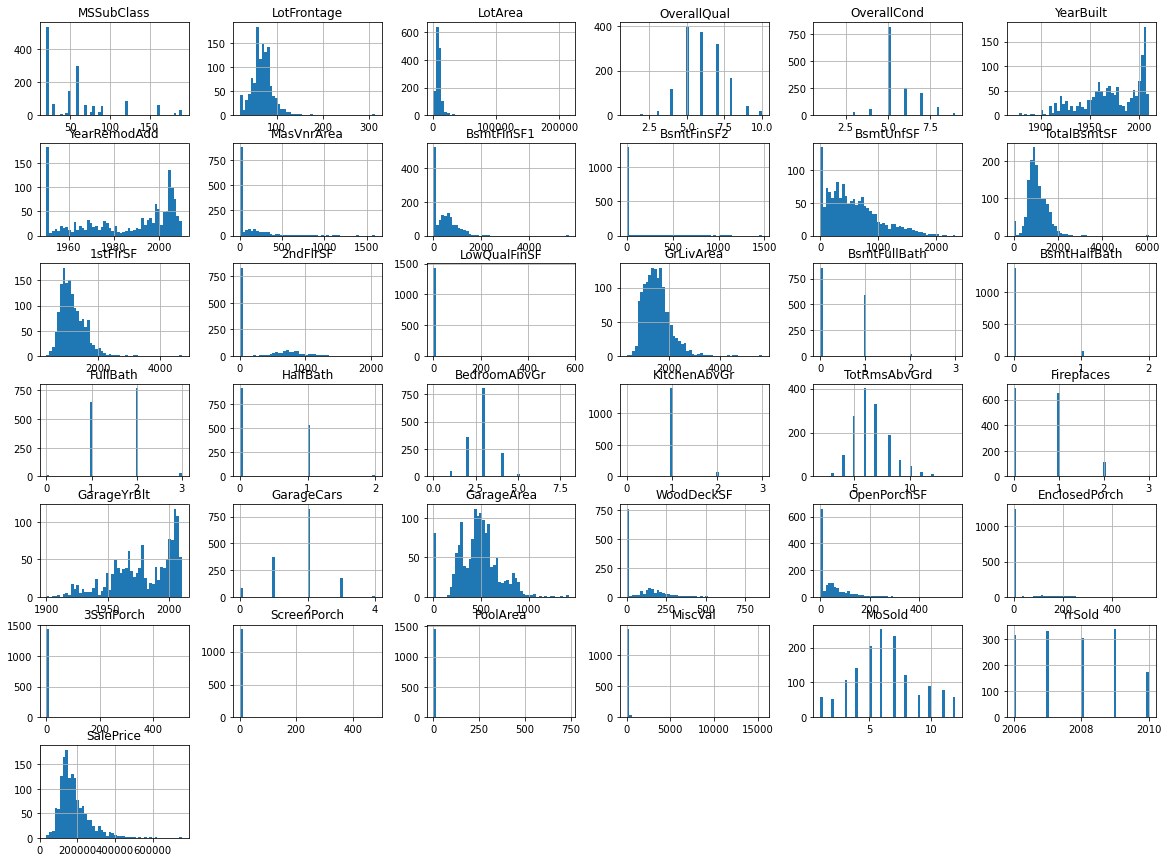

In [101]:
train.hist(bins = 50, figsize = (20, 15))

In [102]:
fillings = {"LotFrontage": train.LotFrontage.fillna(round(train.LotFrontage.mean())), "MasVnrType" : "None", "MasVnrArea": train.MasVnrArea.fillna(round(train.MasVnrArea.mean())),
            "BsmtQual" : "Gd", "BsmtCond": "TA", "BsmtExposure": "No", "BsmtFinType1": "No_info", "BsmtFinType2": "Unf",
           "Electrical": "SBrkr", "GarageType": "Attchd", "GarageYrBlt": "No_info", "GarageFinish": "No_info",
           "GarageQual": "TA", "GarageCond": "TA"}

train = train.fillna(fillings)

test = test.fillna(fillings)

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [104]:
test["MasVnrType"] = test.MasVnrType.fillna("RL")

test["MasVnrType"] = test.MasVnrType.fillna(0)

test["Utilities"] = test.Utilities.fillna("AllPub")

test["Exterior1st"] = test.Exterior1st.fillna("VinylSd")
                                          
test["Exterior2nd"] = test.Exterior2nd.fillna("VinylSd")

test["MasVnrType"] = test.MasVnrType.fillna("None")

test["MasVnrArea"] = test.MasVnrArea.fillna(0.0)

test["BsmtQual"] = test.BsmtQual.fillna("TA")

test["BsmtCond"] = test.BsmtCond.fillna("TA")

test["BsmtExposure"] = test.BsmtExposure.fillna("No")

test["BsmtFinType1"] = test.BsmtFinType1.fillna("GLQ")

test["BsmtFinSF1"] = test.BsmtFinSF1.fillna(0.0)

test["BsmtFinType2"] = test.BsmtFinType2.fillna("TA")

test["BsmtFinSF2"] = test.BsmtFinSF2.fillna(0.0)

test["BsmtUnfSF"] = test.BsmtUnfSF.fillna(0.0)

test["TotalBsmtSF"] = test.TotalBsmtSF.fillna(0.0)

test["BsmtFullBath"] = test.BsmtFullBath.fillna(0.0)

test["BsmtHalfBath"] = test.BsmtHalfBath.fillna(0.0)

test["KitchenQual"] = test.KitchenQual.fillna("TA")

test["Functional"] = test.Functional.fillna("Typ")

test["GarageType"] = test.GarageType.fillna("Attchd")

test["GarageFinish"] = test.GarageFinish.fillna("Unf")

test["GarageCars"] = test.GarageCars.fillna(2.0)

test["GarageArea"] = test.GarageArea.fillna(test.GarageArea.mean())


test["GarageQual"] = test.GarageQual.fillna("TA")

test["GarageCond"] = test.GarageCond.fillna("TA")

test["SaleType"] = test.SaleType.fillna("WD")


test["LotFrontage"] = test.LotFrontage.fillna(test.LotFrontage.mean())

test["MSZoning"] = test.MSZoning.fillna("RL")

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [106]:
y = train["SalePrice"]

X = train.drop("SalePrice", axis = 1)

In [107]:
X = X.drop(["MSZoning", "Street", "LandContour", "LotConfig", "LandSlope",
                             "Condition2", "BldgType", "HouseStyle", "RoofStyle", 
                            "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
                            "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
                            "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir",
                            "Electrical",  "Functional", "GarageType", "GarageFinish",
                              "PavedDrive", "SaleType"], axis = 1)

X = pd.get_dummies(X, columns = ["LotShape", "Utilities", "Condition1", "KitchenQual", "GarageQual", "GarageCond", "SaleCondition", "GarageYrBlt"])

X = X.drop("Neighborhood", axis = 1)

In [108]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_No_info
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,1,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,0,0,0,0,0,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,0,0,0,0,0,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,0,0,0,0,0,0


In [109]:
test = test.drop(["MSZoning", "Street", "LandContour", "LotConfig", "LandSlope",
                             "Condition2", "BldgType", "HouseStyle", "RoofStyle", 
                            "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
                            "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
                            "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir",
                            "Electrical",  "Functional", "GarageType", "GarageFinish",
                              "PavedDrive", "SaleType"], axis = 1)

test = pd.get_dummies(test, columns = ["LotShape", "Utilities", "Condition1", "KitchenQual", "GarageQual", "GarageCond", "SaleCondition"])

test_X =  test.drop("Neighborhood", axis = 1)

In [110]:
test_X.shape

(1459, 69)

In [111]:
X.shape

(1460, 168)

In [112]:
test_X["Utilities_NoSeWa"] = 0

test_X["GarageQual_Ex"] = 0

In [113]:
X.MSSubClass.value_counts(normalize = True)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [114]:
! pip install xgboost

! pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [115]:
import xgboost as xgb

import hyperopt

In [131]:
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import cross_val_score 

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import mean_squared_log_error

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state = 43, shuffle = True)

In [133]:
lin_model = LinearRegression()

In [134]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [135]:
a = lin_model.predict(X_test)

In [136]:
mean_squared_error(y_test, a)**0.5

947786974.9999734

In [137]:
reg_bost = GradientBoostingRegressor(max_depth = 5, min_samples_leaf = 20, n_estimators = 20, subsample = 1.0, max_features = 0.8, verbose = 2)

In [138]:
reg_bost.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1  5646761665.1048            0.08s
         2  4897732911.7030            0.07s
         3  4253888483.2883            0.06s
         4  3707566377.6967            0.06s
         5  3253136837.4774            0.05s
         6  2889291546.1523            0.04s
         7  2578195713.7092            0.04s
         8  2294699851.3718            0.03s
         9  2061180990.9873            0.03s
        10  1864143805.3332            0.02s
        11  1699798245.4837            0.02s
        12  1551514177.3635            0.01s
        13  1432428769.3024            0.01s
        14  1325978292.2278            0.02s
        15  1242920255.9853            0.01s
        16  1161354743.3013            0.01s
        17  1098451928.9420            0.01s
        18  1048010326.2801            0.01s
        19  1004318339.6151            0.00s
        20   965192477.6197            0.00s


GradientBoostingRegressor(max_depth=5, max_features=0.8, min_samples_leaf=20,
                          n_estimators=20, verbose=2)

In [139]:
b = reg_bost.predict(X_test)

In [140]:
mean_squared_error(y_test, b)**0.5

34782.730579682975

In [141]:
params = {"n_estimators": 100,
         "learning_rate": 0.1,
         "max_depth" : 3,
         "min_child_weight": 1,
         "subsample": 1, 
         "colsample_bytree": 1,
         "n_jobs": 4}

reg_xgb = xgb.XGBRegressor(objective = "reg:linear", n_estimators = 100, seed = 123, max_depth = 3)

In [144]:
reg_xgb.fit(X_train, y_train)

[15:22:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [145]:
e = reg_xgb.predict(X_test)

In [146]:
np.sqrt(mean_squared_error(y_test, e))

31632.809510964555

In [166]:
cross_val_score(xgb.XGBRegressor(objective = "reg:linear", n_estimators = 100, seed = 123, max_depth = 3), X, y, cv = 10, scoring = "neg_mean_squared_error")

[15:41:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

array([-5.60552709e+08, -6.16428984e+08, -6.63189489e+08, -1.64911256e+09,
       -9.61438423e+08, -7.03033187e+08, -9.99484554e+08, -4.88143568e+08,
       -9.69476099e+08, -5.58149956e+08])